# Shikha Kumari Verma


# K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

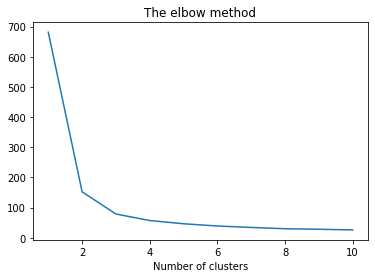

In [4]:
# Finding the optimum number of clusters for k-means classification
x = datasets.load_iris().data
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

In [5]:
#creatind dataframe using dataset iris
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df = pd.DataFrame({'sepal length (cm)': iris.data[:,0], 'sepal width (cm)': iris.data[:,1], 'cluster': iris.target})
iris_df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [7]:
centroids={}
for i in range(3):
    result_list=[]
    result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal length (cm)'].mean())
    result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal width (cm)'].mean())
    centroids[i]=result_list

In [8]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

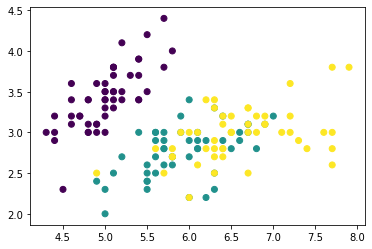

In [10]:
#plotting datapoint
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'], c=iris.target)

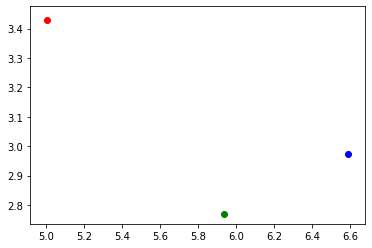

In [11]:
#plotting centroids
colmap={0: 'r', 1: 'g', 2:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

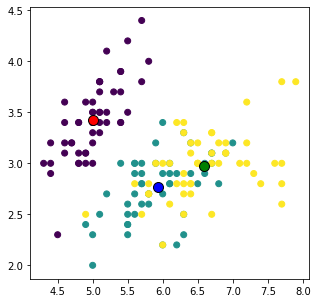

In [13]:
#plotting data point with there centroid
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris.target)
col=[0,1]
colmap={0: 'r', 1: 'b', 2:'g'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],edgecolors='k', s=100) 
plt.show()

In [14]:
def distance(df,centroids):
    for i in range(3):
        df['distance_from{}'.format(i)] =(np.sqrt((df['sepal length (cm)']-centroids[i][0]) **2 + (df['sepal width (cm)']-centroids[i][1])**2))
    return df

In [15]:
df=distance(iris_df,centroids)

In [16]:
centroid_distance_cols=['distance_from{}'.format(i) for i in range(3)]
df['closest_centroid']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
df['closest_centroid']=df['closest_centroid'].map(lambda x: int(x.lstrip('distance_from')))
df['color']=df['closest_centroid'].map(lambda x: colmap[x])

In [17]:
df

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,g
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,b
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,g
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,g


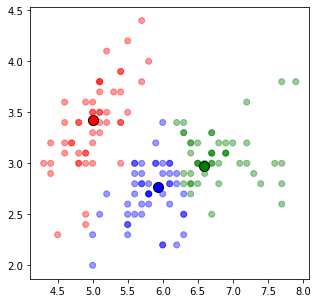

In [19]:
# Visualising the clusters - On the first two columns
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=df['color'],alpha=0.4)
for i in range(3):
    plt.scatter(*centroids[i],color=colmap[i],s=100,edgecolors='k')
plt.show()